In [1]:
#Imports
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [2]:
#Initialize Tweet List
rig_tweets_list = []
funny_tweet_list = []
text_list = []

In [3]:
#Pull tweets from Twitter API that contain "Fake vaccinations" in text of post
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Rigged Election').get_items()):
    if i > 999:
        break
    rig_tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.url])
    text_list.append(tweet.content)

In [4]:
#Create DataFrame
rig_df = pd.DataFrame(rig_tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Reply Count', 'Retweet Count', 'Like Count', 'URL'])

In [5]:
#Convert Text column to lowercase for searching purposes
rig_df['Text'] = rig_df['Text'].str.lower()
rig_df

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
0,2021-01-10 19:54:58+00:00,1348357688493707264,@sensanders as a trump supporter i support thi...,PPennypacker,0,0,0,https://twitter.com/PPennypacker/status/134835...
1,2021-01-10 19:54:45+00:00,1348357630696312832,"they said they won the election. they lied, th...",mozzy29,0,0,0,https://twitter.com/mozzy29/status/13483576306...
2,2021-01-10 19:54:38+00:00,1348357603701657600,@tnmtnlake @mattgaetz and still no proof the e...,ClownShifty,0,0,0,https://twitter.com/ClownShifty/status/1348357...
3,2021-01-10 19:54:21+00:00,1348357532427771905,@dc_draino @barrymoore remember when obama cla...,rickmur77,0,0,0,https://twitter.com/rickmur77/status/134835753...
4,2021-01-10 19:54:19+00:00,1348357522185478145,"@senrobportman hey, what about those election ...",Superstitionsee,0,0,0,https://twitter.com/Superstitionsee/status/134...
...,...,...,...,...,...,...,...,...
995,2021-01-10 17:11:39+00:00,1348316587162439681,i hope when the truth comes out about all the ...,joannemulatz,0,0,0,https://twitter.com/joannemulatz/status/134831...
996,2021-01-10 17:11:37+00:00,1348316577599516672,@stevenespears1 and we need to also observe th...,JohnWesleyShipp,2,0,0,https://twitter.com/JohnWesleyShipp/status/134...
997,2021-01-10 17:10:57+00:00,1348316409672163330,@withakwoww @bbcnews wrong he did not incite v...,davidvikingflag,0,0,0,https://twitter.com/davidvikingflag/status/134...
998,2021-01-10 17:10:50+00:00,1348316380102184960,@erictrump i don't know if you really believe ...,AllenWa05868938,0,0,0,https://twitter.com/AllenWa05868938/status/134...


In [6]:
#Imports
from fuzzywuzzy import fuzz

/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [7]:
#Method to determine if fuzzymatch or not
def fuzzy_match(str1: str, str2: str) -> bool:
    token_set_ratio = fuzz.token_set_ratio(str1, str2)
    if str2 in str1:
        return True
    if token_set_ratio > 55:
        return True
    else:
        return False

In [8]:
fake_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'fake'))==True].count()
trump_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'trump'))==True].count()
stolen_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'stolen'))==True].count()
biden_lost_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'biden lost'))==True].count()
biden_won_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'biden won'))==True].count()
trump_won_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'trump won'))==True].count()
trump_lost_num = rig_df['Text'][rig_df['Text'].apply(lambda str1: fuzzy_match(str1, 'trump lost'))==True].count()
print(fake_num, trump_num, stolen_num, biden_lost_num, biden_won_num, trump_won_num, trump_lost_num)

22 363 63 123 78 323 340


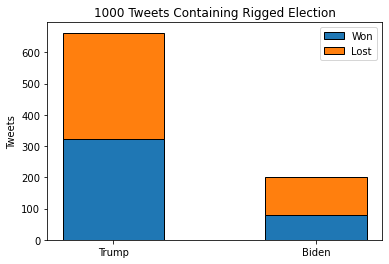

In [9]:
import matplotlib.pyplot as plt


labels = ['Trump', 'Biden']
won_nums = [trump_won_num, biden_won_num]
lost_nums = [trump_lost_num, biden_lost_num]
width = 0.5       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()

ax.bar(labels, won_nums, width, label='Won', edgecolor='black')
ax.bar(labels, lost_nums, width, bottom=won_nums, label='Lost', edgecolor='black')

ax.set_ylabel('Tweets')
ax.set_title('1000 Tweets Containing Rigged Election')
ax.legend()

plt.show()

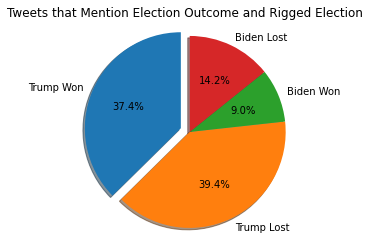

In [10]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sum = trump_won_num + trump_lost_num + biden_won_num + biden_lost_num
labels = 'Trump Won', 'Trump Lost', 'Biden Won', 'Biden Lost'
sizes = [100 * trump_won_num / sum, 100 * trump_lost_num / sum, 100 * biden_won_num / sum, 100 * biden_lost_num / sum]
explode = (0.1, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Tweets that Mention Election Outcome and Rigged Election')
plt.show()